## **Importing Libraries**

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Data Loading and Exploration**

In [315]:
data = pd.read_excel('Cotton.xlsx')
data.describe()

,date,pid,bpid,province_id,lcu_id,district id,place_id,minimum,maximum
count,233152,233152.0,233152.000000,233152.000000,0.0,231751.000000,231751.000000,233152.000000,233152.000000
mean,2018-11-14 14:19:37.559703552,1.0,10.107462,4.216674,NaN,61.489603,336.623121,2744.834109,2976.436797
min,2012-01-02 00:00:00,1.0,7.000000,1.000000,NaN,4.000000,2.000000,75.000000,175.000000
25%,2017-09-14 00:00:00,1.0,7.000000,4.000000,NaN,24.000000,165.000000,1500.000000,1550.000000
50%,2019-02-27 00:00:00,1.0,11.000000,4.000000,NaN,72.000000,344.000000,2050.000000,2399.000000
75%,2020-07-22 00:00:00,1.0,13.000000,5.000000,NaN,96.000000,526.000000,3500.000000,3900.000000
max,2024-01-02 00:00:00,1.0,13.000000,5.000000,NaN,115.000000,658.000000,18600.000000,18600.000000
std,NaN,0.0,2.641935,0.895609,NaN,38.756341,197.400961,1828.084155,1981.978409


In [316]:
data.shape

(233157, 13)

In [317]:
data.head(5)

,date,pid,p,bpid,bp,province_id,lcu_id,province_en,district id,place_id,place,minimum,maximum
0,2012-01-02,1.0,Mumbai,7.0,phutty,5.0,NaN,Sindh,4.0,26.0,Stellar,1200.0,1500.0
1,2012-01-02,1.0,Mumbai,7.0,phutty,5.0,NaN,Sindh,19.0,107.0,Citizen Kane,1800.0,2100.0
2,2012-01-02,1.0,Mumbai,7.0,phutty,5.0,NaN,Sindh,24.0,184.0,Titan,2000.0,2300.0
3,2012-01-02,1.0,Mumbai,7.0,phutty,5.0,NaN,Sindh,32.0,217.0,Memento,1800.0,2100.0
4,2012-01-02,1.0,Mumbai,7.0,phutty,5.0,NaN,Sindh,36.0,447.0,Dawn,1800.0,2100.0


In [318]:
data.dtypes

date           datetime64[ns]
pid                   float64
p                      object
bpid                  float64
bp                     object
province_id           float64
lcu_id                float64
province_en            object
district id           float64
place_id              float64
place                  object
minimum               float64
maximum               float64
dtype: object

# **Data Cleaning**

In [319]:
data.isna().sum()

date                5
pid                 5
p                   5
bpid                5
bp                  5
province_id         5
lcu_id         233157
province_en         5
district id      1406
place_id         1406
place            1406
minimum             5
maximum             5
dtype: int64

In [320]:
data.nunique()

date           2622
pid               1
p                 1
bpid              4
bp                4
province_id       4
lcu_id            0
province_en       4
district id      60
place_id        203
place           203
minimum        1493
maximum        2360
dtype: int64

In [321]:
data['p'].unique()

array(['Mumbai', nan], dtype=object)

In [322]:
data['bp'].unique()

array(['phutty', 'banola', 'banola_khal', 'banola_oil', nan], dtype=object)

In [323]:
data['province_en'].unique()

array(['Sindh', 'Punjab', 'Balochistan', 'KPK', nan], dtype=object)

In [324]:
data['place'].unique()

array(['Stellar ', 'Citizen Kane', 'Titan ', 'Memento', 'Dawn', 'Joker',
       'Farther ', 'Gravity', 'Average', 'Terms ', 'Amelie', 'Casablanca',
       'Matrixes', 'Ryan', 'Grease', 'Gladys', 'Pulp', 'Back ', 'Ark',
       'Pianist', 'Rush', 'Departure', 'History', 'Gladiators ', 'Fellas',
       'Risk', "Schindler's List", 'Enemy', 'Evil', 'Despicable',
       'Fictional ', 'Knights', 'Braveheart', 'Do', 'Forget', 'Lambs',
       'Rings', 'Titer ', 'Screamed', 'Fell ', 'Mile', 'Inside Out',
       'Lord ', 'Gladiator', 'Moonshine', 'American History X',
       'Forrest Gump', 'Tream', 'Metrical', 'Rebel', 'Sin', 'Future',
       'Trill', 'Shaun', 'Hairspray', 'Labs', 'No', 'Teen', 'Terminator',
       'Good ', 'Suspects', 'E.T.', 'Mad', 'Tombstone', 'Hannah',
       'Whiplash', 'Furious', 'Thriller', 'Edgy', 'Rambo', 'Always',
       'Now', 'Mayday', 'Glady', 'Dumby', 'Romeo', 'Fargo', 'Truman',
       'Her', 'Brave ', 'Matrix', 'Dreads', 'Avengers', 'Matric',
       'Parasite', 'E

In [325]:
# drop all rows where all elements are missing
data = data.dropna(how='all')

In [326]:
data.isna().sum()

date                0
pid                 0
p                   0
bpid                0
bp                  0
province_id         0
lcu_id         233152
province_en         0
district id      1401
place_id         1401
place            1401
minimum             0
maximum             0
dtype: int64

In [327]:
# drop all rows where "district id", "place_id", "place" are missing
data = data.dropna(subset=['district id', 'place_id', 'place'])

In [328]:
data['lcu_id'] = 0

In [329]:
data.isna().sum()

date           0
pid            0
p              0
bpid           0
bp             0
province_id    0
lcu_id         0
province_en    0
district id    0
place_id       0
place          0
minimum        0
maximum        0
dtype: int64

In [330]:
data['date'] = pd.to_datetime(data['date'])
id_cols = ['pid', 'bpid', 'province_id', 'lcu_id', 'district id', 'place_id']
for col in id_cols:
    data[col] = data[col].astype(int)
cat_cols = ['p', 'bp', 'province_en', 'place']
for col in cat_cols:
    data[col] = data[col].astype('category')

In [331]:
data.dtypes

date           datetime64[ns]
pid                     int64
p                    category
bpid                    int64
bp                   category
province_id             int64
lcu_id                  int64
province_en          category
district id             int64
place_id                int64
place                category
minimum               float64
maximum               float64
dtype: object

In [332]:
# swap minimum and maximum values of minimum and maximum columns if minimum > maximum
data['minimum'] = np.where(data['minimum'] > data['maximum'], data['maximum'], data['minimum'])
data['maximum'] = np.where(data['maximum'] < data['minimum'], data['minimum'], data['maximum'])


# **Line Graph**

In [333]:
data['month_year'] = data['date'].dt.to_period('M')

In [334]:
def plot_bp(bp_name):
  filtered_data = data[data['bp'] == bp_name]

  grouped = filtered_data.groupby('month_year').agg(min_min=('minimum', 'min'), max_max=('maximum', 'max'))

  # Plotting
  plt.figure(figsize=(25, 5))
  plt.plot(grouped.index.astype(str), grouped['min_min'], label='Min of Minimum', marker='o')
  plt.plot(grouped.index.astype(str), grouped['max_max'], label='Max of Maximum', marker='o')
  plt.title(f'Trends for {bp_name}')
  plt.xlabel('Month-Year')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.tight_layout()  # Adjust subplots to give some padding
  plt.show()

In [335]:
def handle_outliers(bp_name):
  bp_data = data[data['bp'] == bp_name]

  monthly_means = bp_data.groupby('month_year').agg(mean_min=('minimum', 'mean'), mean_max=('maximum', 'mean'))

  min_replacements = 0
  max_replacements = 0

  for index, row in bp_data.iterrows():
    month = row['month_year']
    if abs(row['minimum'] - monthly_means.loc[month, 'mean_min']) > monthly_means.loc[month, 'mean_min'] * 0.25:
      data.at[index, 'minimum'] = monthly_means.loc[month, 'mean_min']
      min_replacements += 1
    if abs(row['maximum'] - monthly_means.loc[month, 'mean_max']) > monthly_means.loc[month, 'mean_max'] * 0.25:
      data.at[index, 'maximum'] = monthly_means.loc[month, 'mean_max']
      max_replacements += 1

  print(f"Number of minimum replacements for {bp_name}: {min_replacements}")
  print(f"Number of maximum replacements for {bp_name}: {max_replacements}")


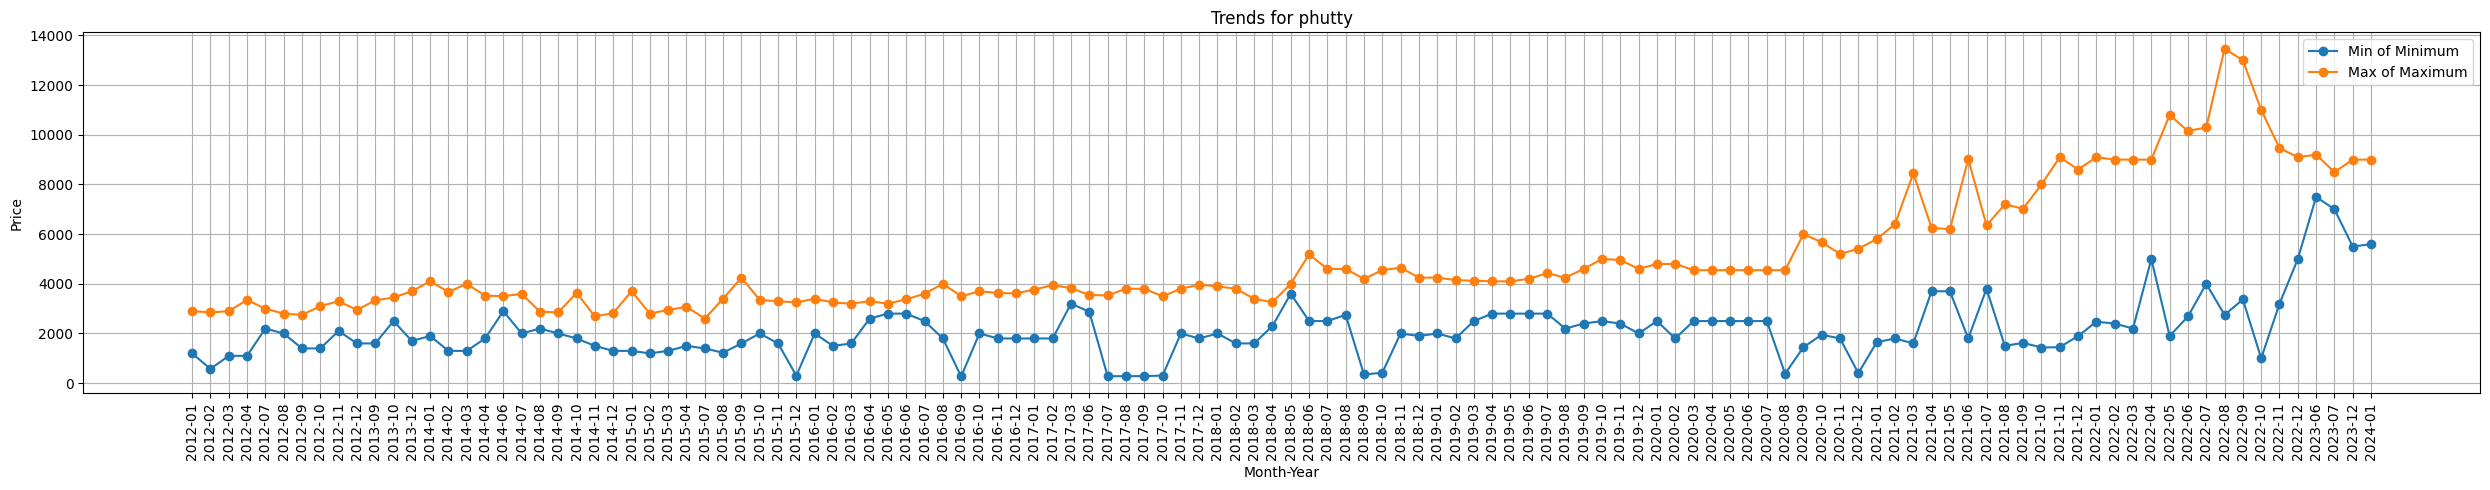

Number of minimum replacements for phutty: 6105
Number of maximum replacements for phutty: 797


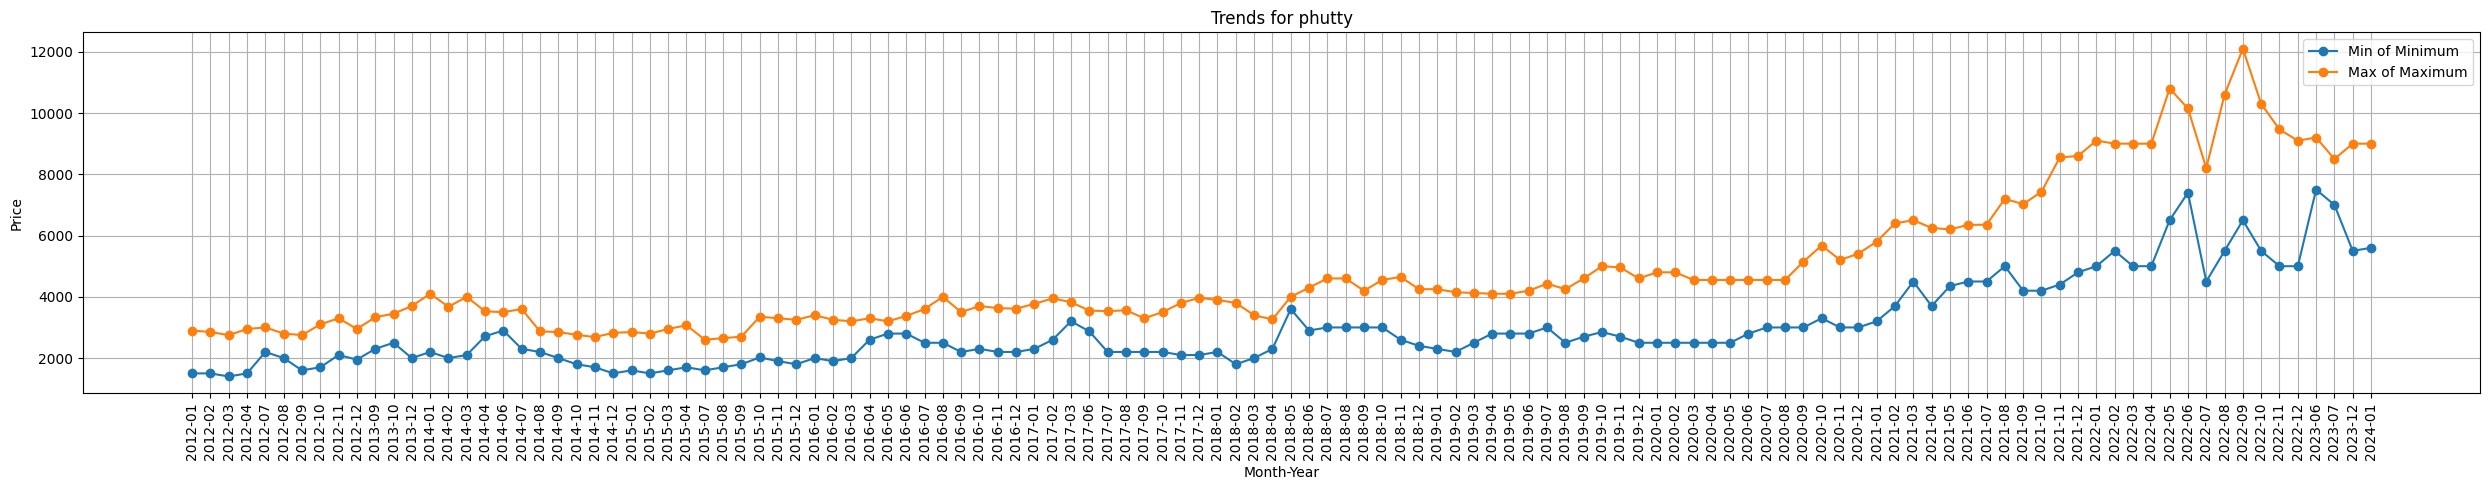

In [336]:
plot_bp('phutty')
handle_outliers('phutty')
plot_bp('phutty')

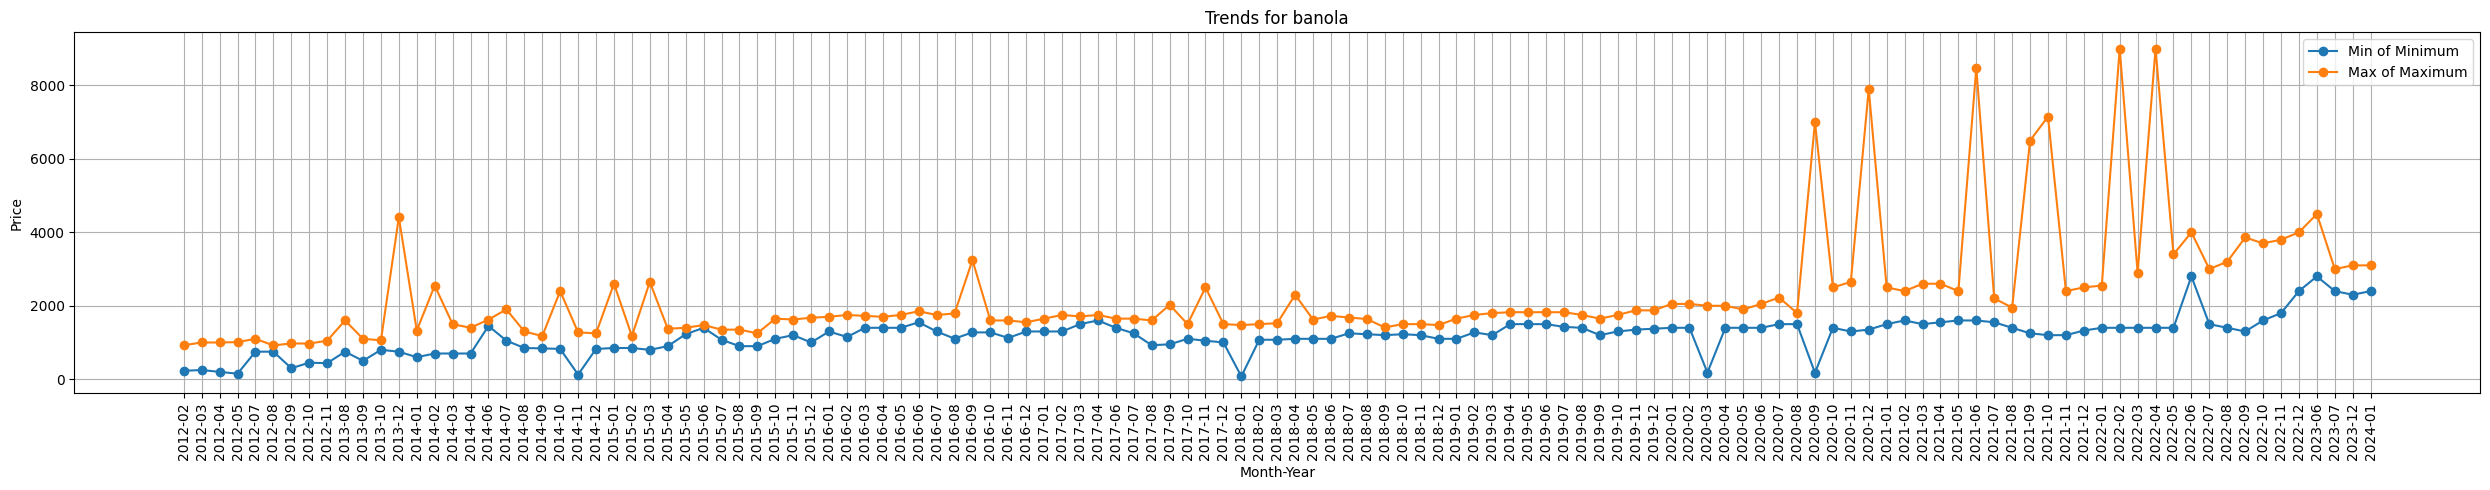

Number of minimum replacements for banola: 1600
Number of maximum replacements for banola: 892


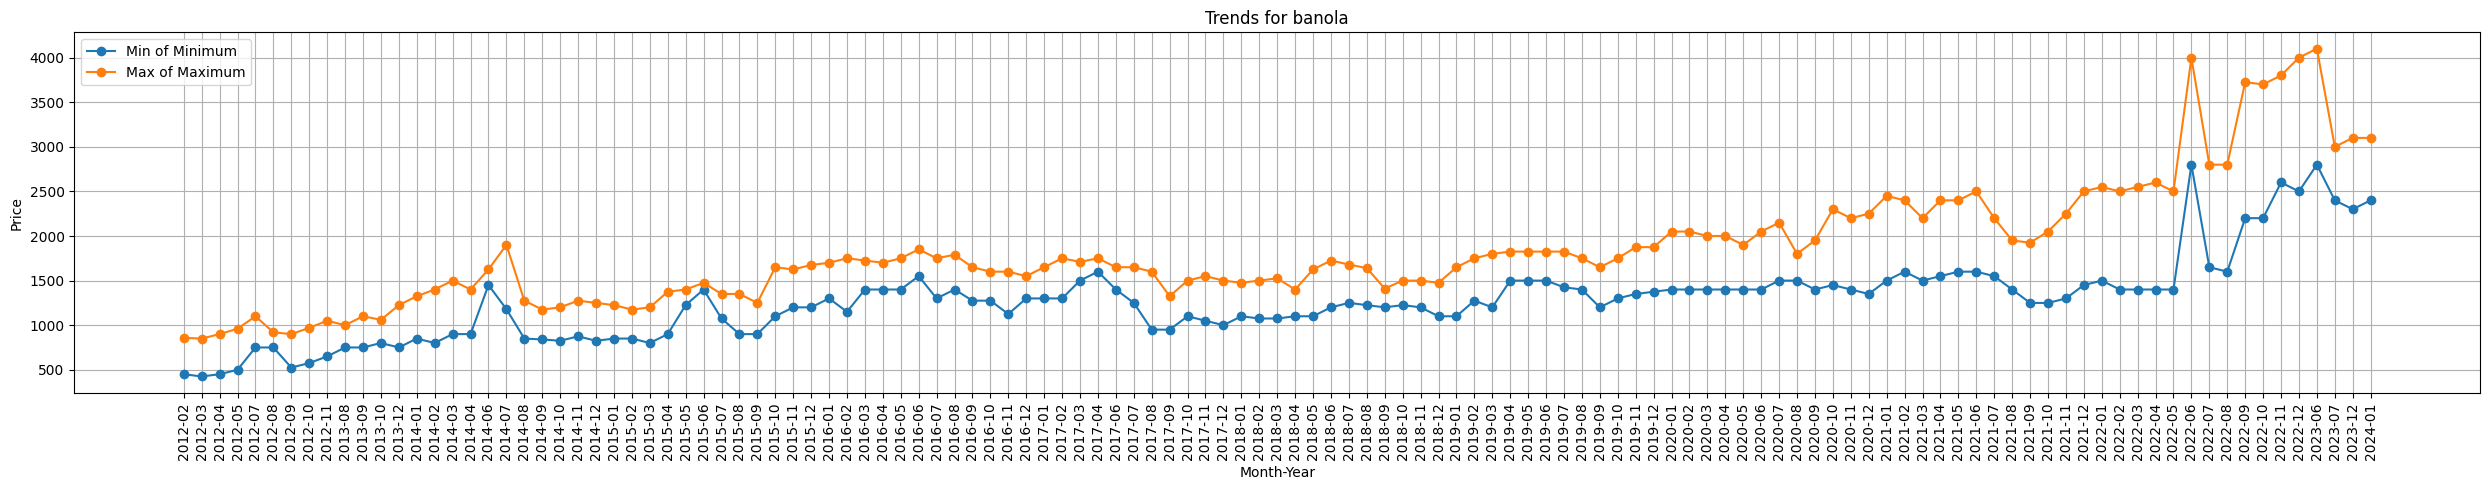

In [337]:
plot_bp('banola')
handle_outliers('banola')
plot_bp('banola')

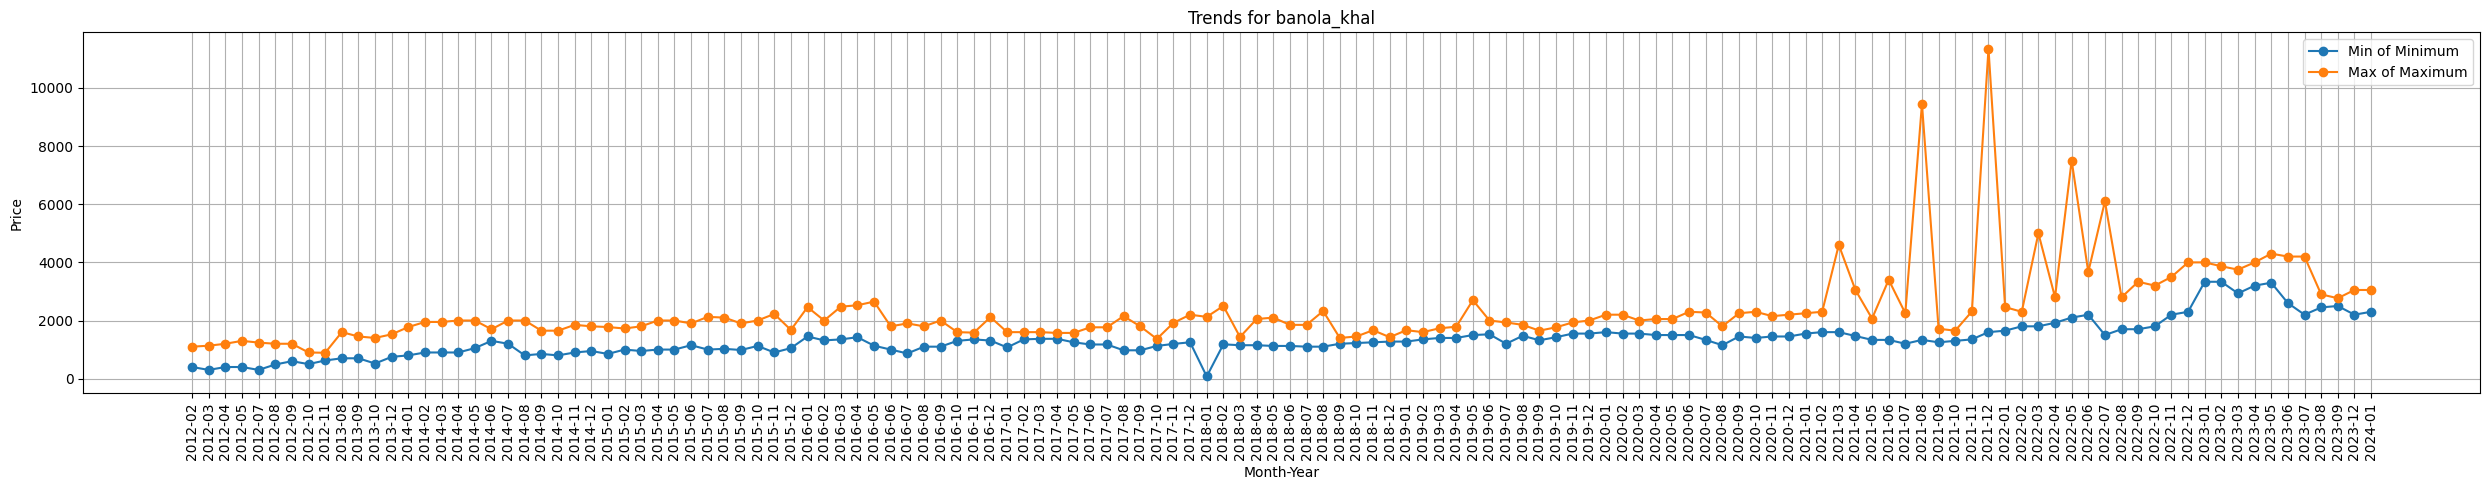

Number of minimum replacements for banola_khal: 2319
Number of maximum replacements for banola_khal: 1877


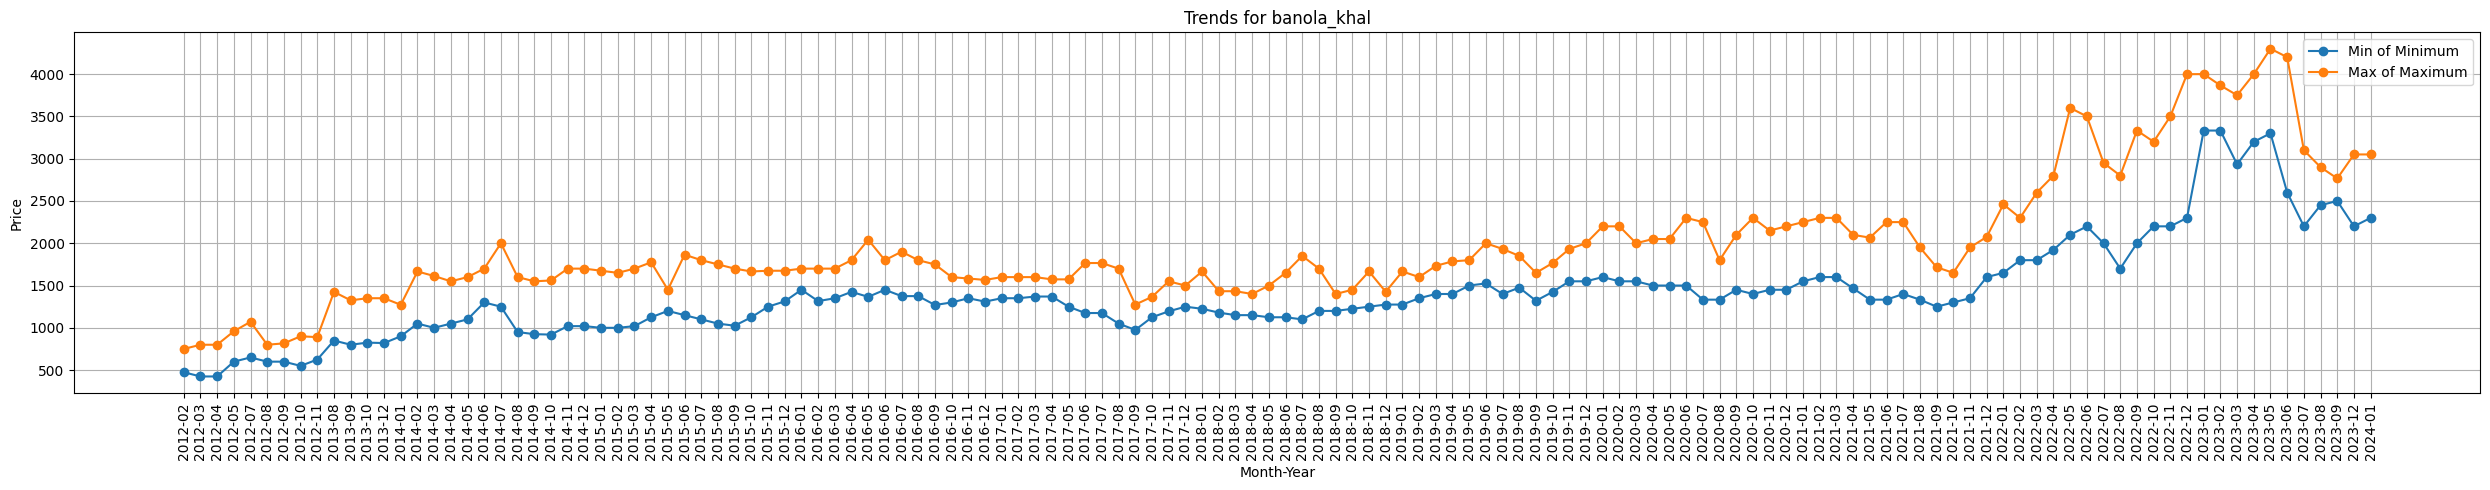

In [338]:
plot_bp('banola_khal')
handle_outliers('banola_khal')
plot_bp('banola_khal')

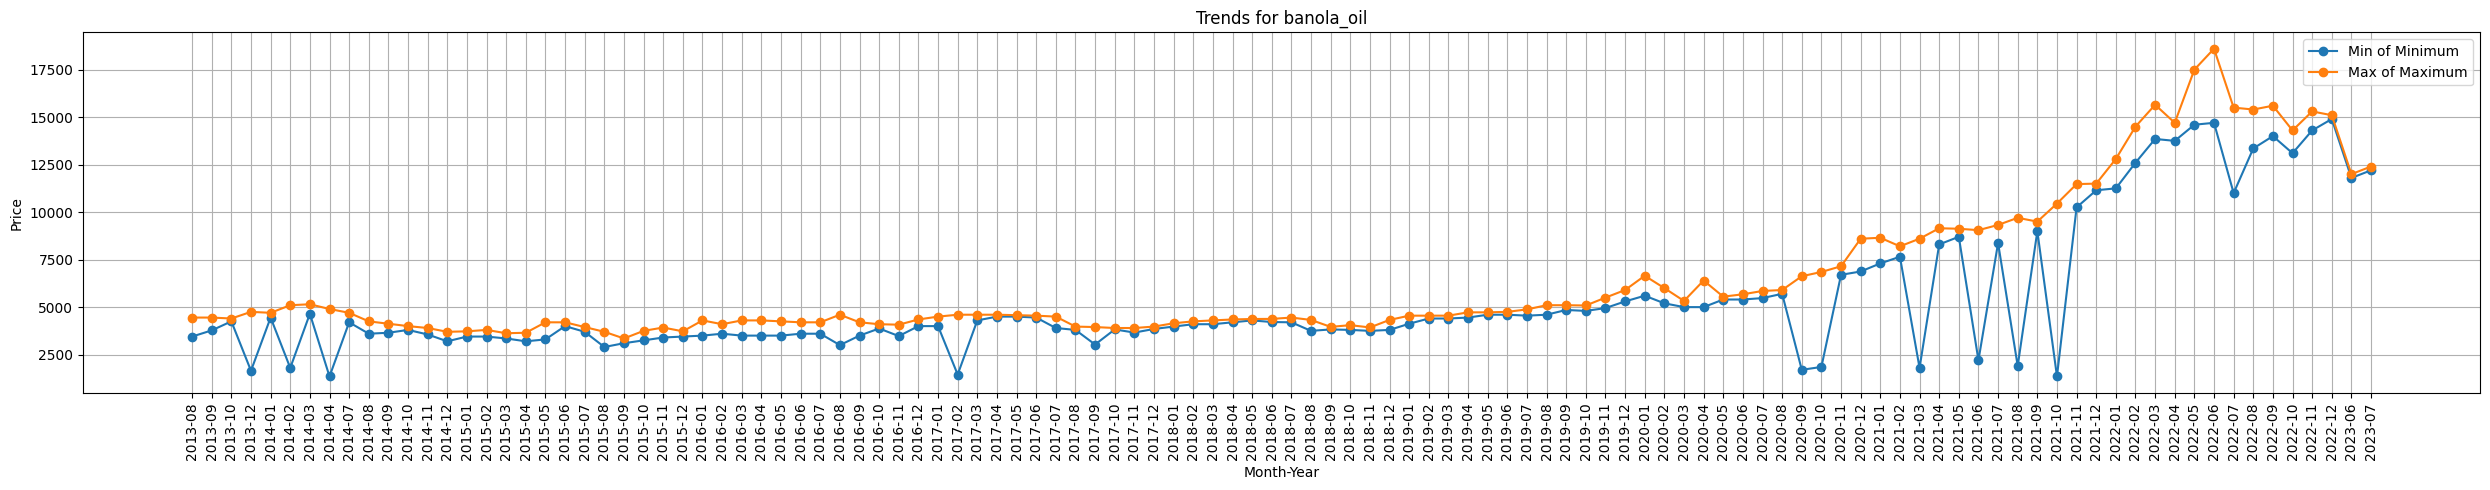

Number of minimum replacements for banola_oil: 24
Number of maximum replacements for banola_oil: 19


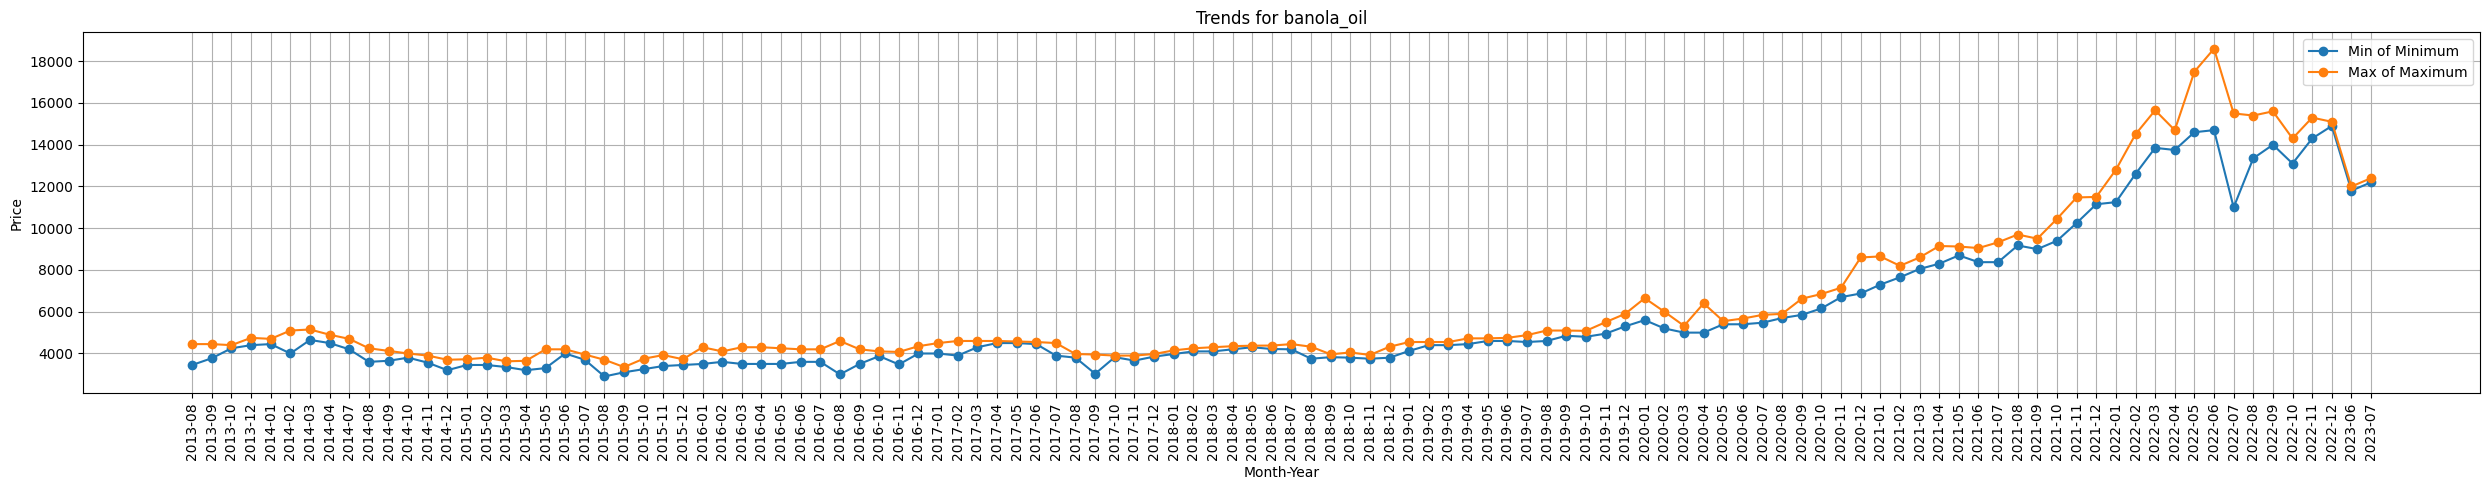

In [339]:
plot_bp('banola_oil')
handle_outliers('banola_oil')
plot_bp('banola_oil')

## **Write to Excel**

In [340]:
output_path = 'Updated_Cotton.xlsx'
data.to_excel(output_path, index=False)